## 1-D Fokker-Plank Equation

 Parameter inference is based on calculating the first two Kramers-Moyal coefficients, as explained in detail in Appendix A of https://doi.org/10.1103/PhysRevX.11.031022 

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import fokker_planck
import numpy as np
import pickle
import datetime
import os

In [2]:
name_data = "sample_trajectories.pkl"

# Generate sample trajectories


This code generates sample trajectories of various lengths, which are used by the example notebook                                   "Parameter inference via Kramers-Moyal coefficients.ipynb" to demonstrate parameter inference via Kramers-Moyal coefficients.


In [5]:

os.makedirs("data")

Fn =  os.path.join(os.getcwd(),"data",name_data)

# initialize random number generator
rng = np.random.default_rng()

# Set simulation parameters
dt = 1e-5 # timestep for simulation
dt_out = 1e-4 # timestep of saved trajectories
stride_out = int(np.round(dt_out/dt))
N_sim = 4000 # number of trajectories to be generated

# For each trajectory, we use a random number of timesteps. This is to
# show that the parameter inference works with trajectory samples of
# various lengths.
# The number of timesteps for each trajectory is sampled from a uniform
# distribution on the interes from N_steps_min to N_steps_max, which are
# defined here:
N_steps_mean = int(np.round(0.05/dt))
N_steps_min = N_steps_mean*0.5
N_steps_max = N_steps_mean*1.5
# generate an array that contains the number of steps of all trajectories:
N_steps = rng.integers(low=N_steps_min,
                        high=N_steps_max,
                        size=N_sim)

# For each simulation, the initial condition is drawn from a uniform
# distribution on [x_L, x_R], using the following values:
x_L = -1.5
x_R = 1.5

# Definition of the parameters of the Langevin equation.
#
# We simulate the Ito-Langevin equation
#          dX_t = a(X_t) * dt  +  sqrt(2*D) * dW_t,
# where dX_t is the increment of the reaction coordinate at time t,
# a(x) is the drift, D is the diffusivity (which we assume to be a constant
# number, meaning we consider additive noise), and dW_t is the increment
# of the Wiener process.
#
# We consider a constant diffusivity
D = 1.
# and a gradient drift a(x) = -dU/dx that originates from a double-well potential
# U(x) = U0 * ( x**2 - 1 )**2, so that a(x) = -4 * U0 * ( x**2 - 1 ) * x.
U0 = 2.
a = lambda x: -4*U0*(x**2 - 1)*x


trajectories = []
print("{time}\tStarting simulation of {total} trajectories...".format(
                total =N_sim,
            time=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
for i in range(N_sim):
    print("{time}\tRunning simulation {cur_int} of {total}...".format(cur_int=i+1,
                    total =N_sim,
                time=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')),
                end='\r')
    #
    # generate array containing current trajectory
    current_trajectory = np.zeros(N_steps[i]+1,dtype=float)
    # generate initial condition for current trajectory
    current_trajectory[0] = rng.random()*(x_R-x_L) + x_L
    #
    # generate all random numbers for the current simulation
    random_numbers_for_current_simulation = rng.normal(size=N_steps[i])
    random_numbers_for_current_simulation *= np.sqrt(2*D*dt)
    #
    # run simulation using Euler-Maruyama algorithm
    for j,current_x in enumerate(current_trajectory[:-1]):
        current_trajectory[j+1] = dt*a(current_x) \
                            + random_numbers_for_current_simulation[j] \
                            + current_x
    #
    # append current trajectory to list of trajectories
    trajectories.append(current_trajectory[::stride_out])

print("{time}\tFinished simulation {total} trajectories.              ".format(
                total =N_sim,
            time=datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')),
            end='\n')

# save resulting trajectories
pickle.dump(trajectories,open(Fn,'wb'))


2024-02-05 20:30:18	Starting simulation of 4000 trajectories...
2024-02-05 20:30:49	Finished simulation 4000 trajectories.              


# Analyze data

In [3]:
# the pickle file should contain a list of 1D arrays, i.e. 
trajectories = pickle.load(open(f"./data/{name_data}", "rb"))
# must lead to an object "trajectories" such that
#     trajectories[i] = 1D array
# for i = 0, ..., len(trajectories)

In [4]:
print("number of elements: ", len(trajectories))
print("one element: ", trajectories[0].shape, "first column:", trajectories[0][0])

number of elements:  4000
one element:  (592,) first column: -0.9390955878700228


In [5]:
# directory where the index we create will be saved:
index_directory = './' 

# timestep of the trajectories
dt = 1e-4

# create a dictionary with the parameters
parameters = {'index_directory':index_directory,
            'trajectories_filename':name_data,
            'dt':dt}

# create an instance of the kramers_moyal class
inference = fokker_planck.inference(parameters)

In [9]:
# parameters of an existing class can be changed by creating a dictionary
# with the new parameters, and by passing that dictionary to the class:
N_bins = 120
updated_parameters = {'N_bins':N_bins}

inference.set_parameters(updated_parameters)
inference.get_parameters()

{'trajectories_filename': 'sample_trajectories.pkl',
 'index_directory': './',
 'xl': -1.79478071158876,
 'xr': 1.8313425827270549,
 'dx': 0.03021769411929846,
 'dt': 0.0001,
 'N_bins': 120,
 'x': array([-1.77967186, -1.74945417, -1.71923648, -1.68901878, -1.65880109,
        -1.62858339, -1.5983657 , -1.56814801, -1.53793031, -1.50771262,
        -1.47749492, -1.44727723, -1.41705954, -1.38684184, -1.35662415,
        -1.32640645, -1.29618876, -1.26597106, -1.23575337, -1.20553568,
        -1.17531798, -1.14510029, -1.11488259, -1.0846649 , -1.05444721,
        -1.02422951, -0.99401182, -0.96379412, -0.93357643, -0.90335874,
        -0.87314104, -0.84292335, -0.81270565, -0.78248796, -0.75227026,
        -0.72205257, -0.69183488, -0.66161718, -0.63139949, -0.60118179,
        -0.5709641 , -0.54074641, -0.51052871, -0.48031102, -0.45009332,
        -0.41987563, -0.38965794, -0.35944024, -0.32922255, -0.29900485,
        -0.26878716, -0.23856946, -0.20835177, -0.17813408, -0.14791638,
 

In [29]:
inference

In [37]:
inference.get_parameters()

{'trajectories_filename': 'sample_trajectories.pkl',
 'index_directory': './',
 'xl': -inf,
 'xr': inf,
 'dx': 'not set',
 'dt': 0.0001,
 'N_bins': 100,
 'x': 'not set'}

In [10]:
# parameters of an existing class can be changed by creating a dictionary
# with the new parameters, and by passing that dictionary to the class:
N_bins = 120
updated_parameters = {'N_bins':N_bins}

inference.set_parameters(updated_parameters)
inference.get_parameters()

{'trajectories_filename': 'sample_trajectories.pkl',
 'index_directory': './',
 'xl': -1.79478071158876,
 'xr': 1.8313425827270549,
 'dx': 0.03021769411929846,
 'dt': 0.0001,
 'N_bins': 120,
 'x': array([-1.77967186, -1.74945417, -1.71923648, -1.68901878, -1.65880109,
        -1.62858339, -1.5983657 , -1.56814801, -1.53793031, -1.50771262,
        -1.47749492, -1.44727723, -1.41705954, -1.38684184, -1.35662415,
        -1.32640645, -1.29618876, -1.26597106, -1.23575337, -1.20553568,
        -1.17531798, -1.14510029, -1.11488259, -1.0846649 , -1.05444721,
        -1.02422951, -0.99401182, -0.96379412, -0.93357643, -0.90335874,
        -0.87314104, -0.84292335, -0.81270565, -0.78248796, -0.75227026,
        -0.72205257, -0.69183488, -0.66161718, -0.63139949, -0.60118179,
        -0.5709641 , -0.54074641, -0.51052871, -0.48031102, -0.45009332,
        -0.41987563, -0.38965794, -0.35944024, -0.32922255, -0.29900485,
        -0.26878716, -0.23856946, -0.20835177, -0.17813408, -0.14791638,
 

In [11]:
# the trajectories are loaded from the pickle file stored in the class variable "trajectories_filename"
inference.load_trajectories()

# instead of loading a pickle file, already loaded trajectories can alternatively be imported, via:
#
# preloaded_trajectories = [ list of 1D arrays with trajectories ]
# inference.import_trajectories(preloaded_trajectories)

# Note that only one list of trajectories can be loaded at one time. If several datasets are to be used, 
# they should be merged before passing them to the inference class.

Loaded 4000 trajectories.


In [12]:
# after loading trajectories, the class variables 
# xl, xr, dx, x 
# are automatically updated:
inference.get_parameters()

{'trajectories_filename': 'sample_trajectories.pkl',
 'index_directory': './',
 'xl': -1.79478071158876,
 'xr': 1.8313425827270549,
 'dx': 0.03021769411929846,
 'dt': 0.0001,
 'N_bins': 120,
 'x': array([-1.77967186, -1.74945417, -1.71923648, -1.68901878, -1.65880109,
        -1.62858339, -1.5983657 , -1.56814801, -1.53793031, -1.50771262,
        -1.47749492, -1.44727723, -1.41705954, -1.38684184, -1.35662415,
        -1.32640645, -1.29618876, -1.26597106, -1.23575337, -1.20553568,
        -1.17531798, -1.14510029, -1.11488259, -1.0846649 , -1.05444721,
        -1.02422951, -0.99401182, -0.96379412, -0.93357643, -0.90335874,
        -0.87314104, -0.84292335, -0.81270565, -0.78248796, -0.75227026,
        -0.72205257, -0.69183488, -0.66161718, -0.63139949, -0.60118179,
        -0.5709641 , -0.54074641, -0.51052871, -0.48031102, -0.45009332,
        -0.41987563, -0.38965794, -0.35944024, -0.32922255, -0.29900485,
        -0.26878716, -0.23856946, -0.20835177, -0.17813408, -0.14791638,
 

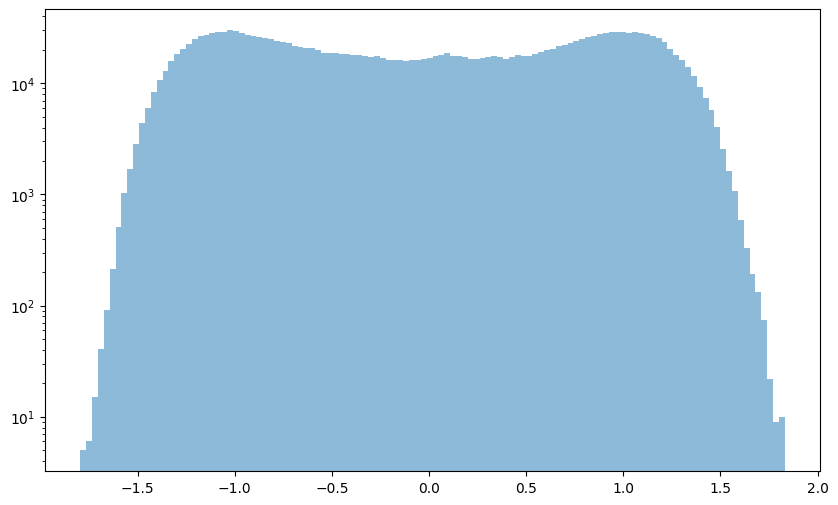

In [13]:
# to see how many datapoints are available within each bin, we create 
# a histogram of the loaded data:

N_hist = N_bins # we use the same number of bins as for the inference
hist, bin_edges = inference.get_histogram(N_hist=N_hist)

bin_centers = (bin_edges[1:] + bin_edges[:-1])/2.
bar_width = bin_centers[1] - bin_centers[0]

fig,ax = plt.subplots(1,1,figsize=(10,6))
ax.bar(bin_centers,hist,width=bar_width,
      alpha=0.5)
ax.set_yscale('log')
plt.show()
plt.close(fig)


In [14]:
inference.create_index()

Finished creating index. Processed 4000 trajectories. 


In [15]:
inference.save_index()

In [16]:
# delete instance of class
del inference

In [18]:
# create new instance of the class, which needs to know where we store the index files, 
# and where we store the trajectories

parameters = {'index_directory':index_directory,
            'trajectories_filename':name_data}

inference = fokker_planck.inference(parameters=parameters)
inference.load_trajectories()
inference.load_index()

# upon loading the index, all parameters from the previous instance are recovered:
inference.get_parameters()

Loaded 4000 trajectories.


{'trajectories_filename': 'sample_trajectories.pkl',
 'index_directory': './',
 'xl': -1.79478071158876,
 'xr': 1.8313425827270549,
 'dx': 0.03021769411929846,
 'dt': 0.0001,
 'N_bins': 120,
 'x': array([-1.77967186, -1.74945417, -1.71923648, -1.68901878, -1.65880109,
        -1.62858339, -1.5983657 , -1.56814801, -1.53793031, -1.50771262,
        -1.47749492, -1.44727723, -1.41705954, -1.38684184, -1.35662415,
        -1.32640645, -1.29618876, -1.26597106, -1.23575337, -1.20553568,
        -1.17531798, -1.14510029, -1.11488259, -1.0846649 , -1.05444721,
        -1.02422951, -0.99401182, -0.96379412, -0.93357643, -0.90335874,
        -0.87314104, -0.84292335, -0.81270565, -0.78248796, -0.75227026,
        -0.72205257, -0.69183488, -0.66161718, -0.63139949, -0.60118179,
        -0.5709641 , -0.54074641, -0.51052871, -0.48031102, -0.45009332,
        -0.41987563, -0.38965794, -0.35944024, -0.32922255, -0.29900485,
        -0.26878716, -0.23856946, -0.20835177, -0.17813408, -0.14791638,
 

# Run inference and plot results
With the trajectories and the index loaded into the class instance, we can finally run the inference:

In [19]:
# if the inference is run without an argument, the value N_shift = 1 is used
inference_result = inference.run_inference() # = inference.run_inference(N_shift=1)

# the call returns a dictionary with the bin centers x, as well as the 
# inferred diffusivity and drift at those bin centers:
x = inference_result['x']
D = inference_result['D']
a = inference_result['a']

Finished inference with 120 bins.                   


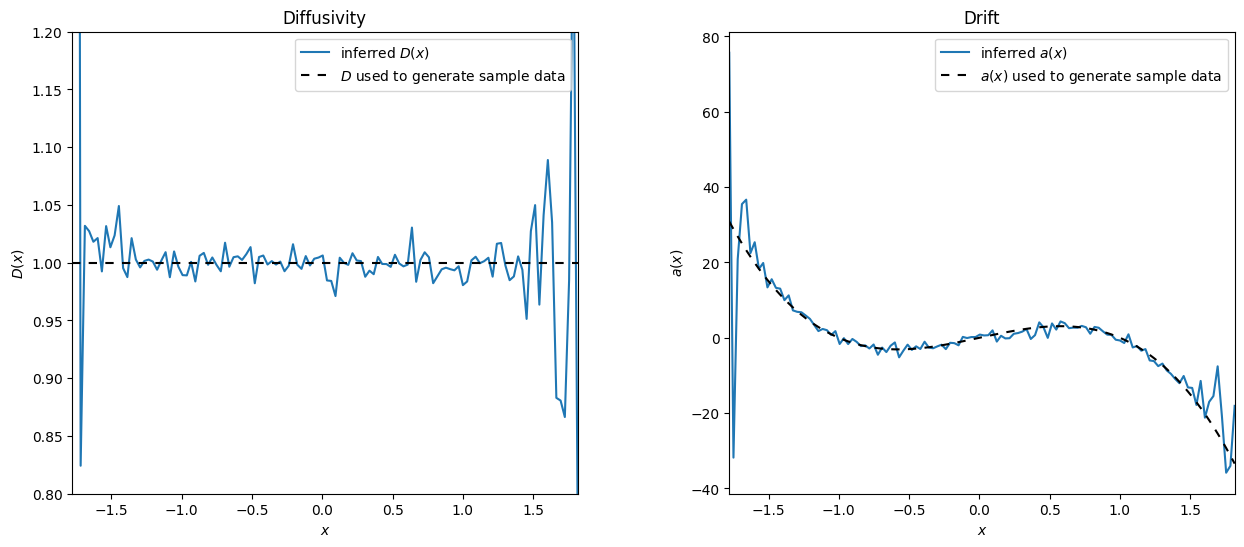

In [20]:
# we plot the results, and compare them to the input D and a(x) used for 
# generating the sample data:

fig,axes = plt.subplots(1,2,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)

ax = axes[0]
ax.set_title('Diffusivity')
ax.plot(x,D,
       label=r'inferred $D(x)$')
ax.axhline(1.,
        dashes=[4,4],
           label='$D$ used to generate sample data',
          color='black')
ax.set_ylim(0.8,1.2)
ax.set_xlim(np.min(x),np.max(x))
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$D(x)$')

ax = axes[1]
ax.set_title('Drift')
ax.plot(x,a,
        label=r'inferred $a(x)$')
ax.plot(x,-4*2*(x**2-1)*x,
        dashes=[4,4],
           label=r'$a(x)$ used to generate sample data',
       color='black')
ax.set_xlim(np.min(x),np.max(x))
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$a(x)$')

plt.show()
plt.close(fig)

In [21]:
N_shifts = [1,10,50,100]

inference_results = []

for i,N_shift in enumerate(N_shifts):
    print("Running inference for N_shift = {0}".format(N_shift))
    inference_result = inference.run_inference(N_shift=N_shift)
    inference_results.append(inference_result)

Running inference for N_shift = 1
Finished inference with 120 bins.                   
Running inference for N_shift = 10
Finished inference with 120 bins.                   
Running inference for N_shift = 50
Finished inference with 120 bins.                   
Running inference for N_shift = 100
Finished inference with 120 bins.                   


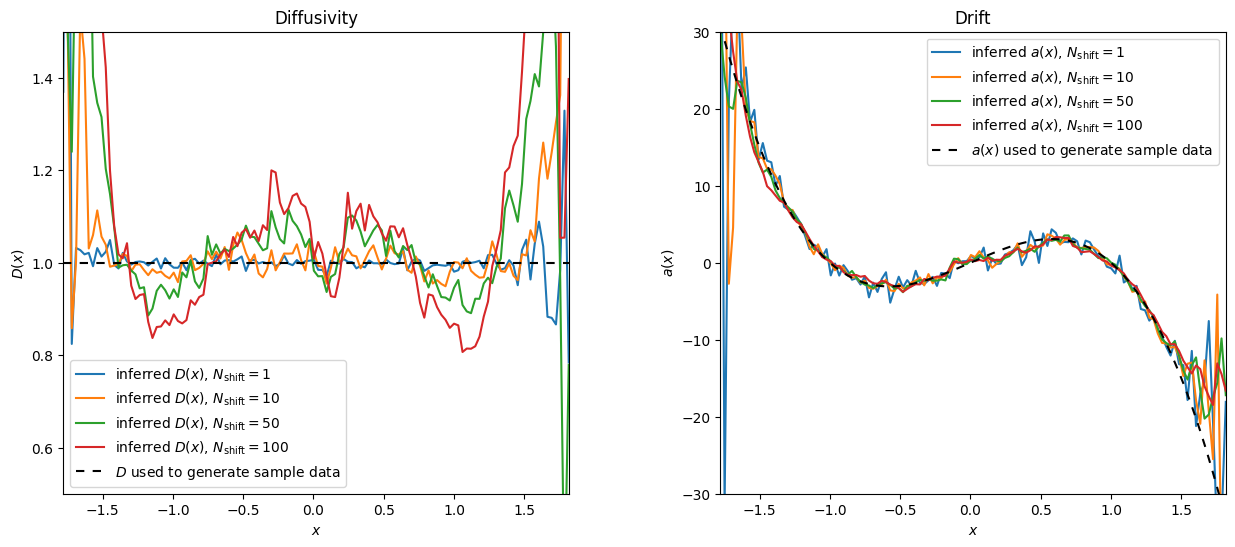

In [22]:
fig,axes = plt.subplots(1,2,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)

for i, inference_result in enumerate(inference_results):
    x = inference_result['x']
    D = inference_result['D']
    a = inference_result['a']
    #
    axes[0].plot(x,D,
       label=r'inferred $D(x)$, $N_{\mathrm{shift}} = $' + '{0}'.format(N_shifts[i]))
    axes[1].plot(x,a,
        label=r'inferred $a(x)$, $N_{\mathrm{shift}} = $' + '{0}'.format(N_shifts[i]))

ax = axes[0]
ax.set_title('Diffusivity')
ax.axhline(1.,
        dashes=[4,4],
           label='$D$ used to generate sample data',
          color='black')
ax.set_ylim(0.5,1.5)
ax.set_xlim(np.min(x),np.max(x))
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$D(x)$')

ax = axes[1]
ax.set_title('Drift')
ax.plot(x,-4*2*(x**2-1)*x,
        dashes=[4,4],
           label=r'$a(x)$ used to generate sample data',
       color='black')
ax.set_ylim(-30,30)
ax.set_xlim(np.min(x),np.max(x))
ax.legend(loc='best')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$a(x)$')

plt.show()
plt.close(fig)


# References

https://github.com/juliankappler/fokker-planck